In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('NIFTY_50_Preprocessed.csv')

In [3]:
df.head()

,Date,Close
0,2019-07-01,11865.60
1,2019-07-02,11910.30
2,2019-07-03,11916.75
3,2019-07-04,11946.75
4,2019-07-05,11811.15


In [4]:
df.tail()

,Date,Close
1301,2024-06-25,23721.30
1302,2024-06-26,23868.80
1303,2024-06-27,24044.50
1304,2024-06-28,24010.60
1305,2024-07-01,24141.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1306 non-null   object 
 1   Close   1306 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


# convert date to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.sort_values('Date', inplace=True)

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Close
Date,
2019-07-01,11865.60
2019-07-02,11910.30
2019-07-03,11916.75
2019-07-04,11946.75
2019-07-05,11811.15


In [10]:
df.tail()

,Close
Date,
2024-06-25,23721.30
2024-06-26,23868.80
2024-06-27,24044.50
2024-06-28,24010.60
2024-07-01,24141.95


In [11]:
df.isnull().sum()

Close    0
dtype: int64

In [12]:
df.shape

(1306, 1)

In [13]:
df.describe()

,Close
count,1306.000000
mean,16035.527259
std,3741.947809
min,7610.250000
25%,12141.250000
50%,16957.050000
75%,18268.112500
max,24141.950000


<AxesSubplot:xlabel='Date'>

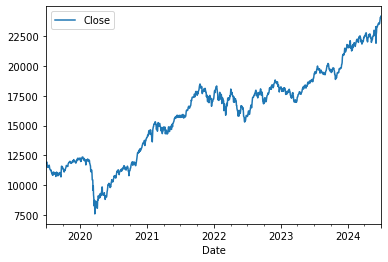

In [14]:
df.plot()

# Plotting the 'Close' prices

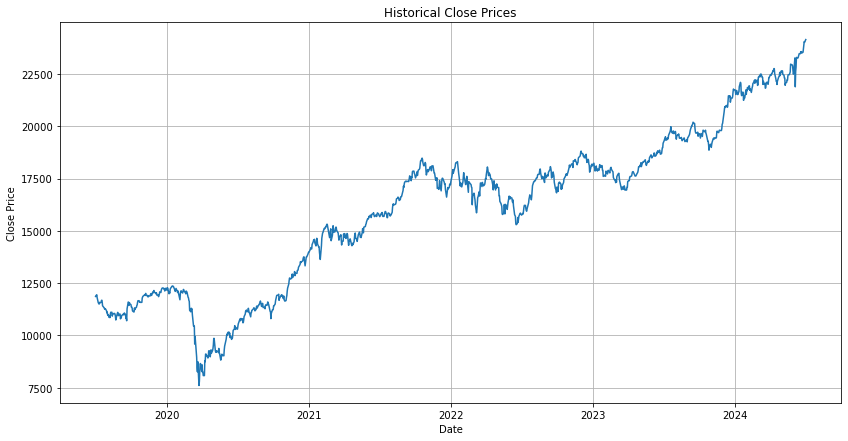

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'])
plt.title('Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Testing for Stationary using Augumented dickey fuller test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Close'])

# H0:It is non Stationary
# H1: It is Stationary

In [18]:
def adfuller_test(close):
    result=adfuller(close)
    labels=["ADF test statictics","p-value","lags used","Number of observation"]
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print('Series is Stationary')
    else: 
        print('Series is Not Stationary')

In [19]:
adfuller_test(df["Close"])

ADF test statictics:0.2924935806553572
p-value:0.9769974632141429
lags used:6
Number of observation:1299
Series is Not Stationary


# Differencing to make the series stationary

In [20]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
adfuller_test(df['Close_diff'].dropna())

ADF test statictics:-14.695008122285477
p-value:3.00797266473805e-27
lags used:5
Number of observation:1299
Series is Stationary


<AxesSubplot:xlabel='Date'>

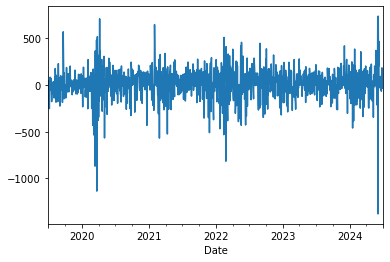

In [21]:
df["Close_diff"].plot()

# Plot ACF and PACF

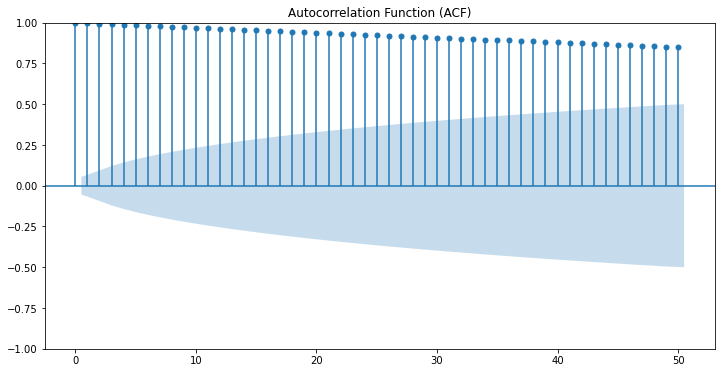

In [22]:
# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

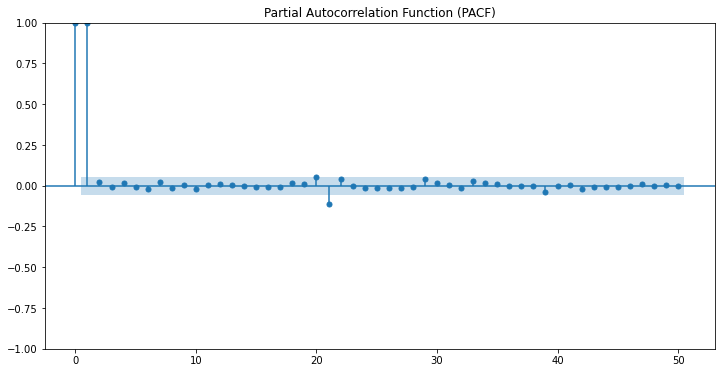

In [23]:
# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Close'], lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Time series Decomposition 

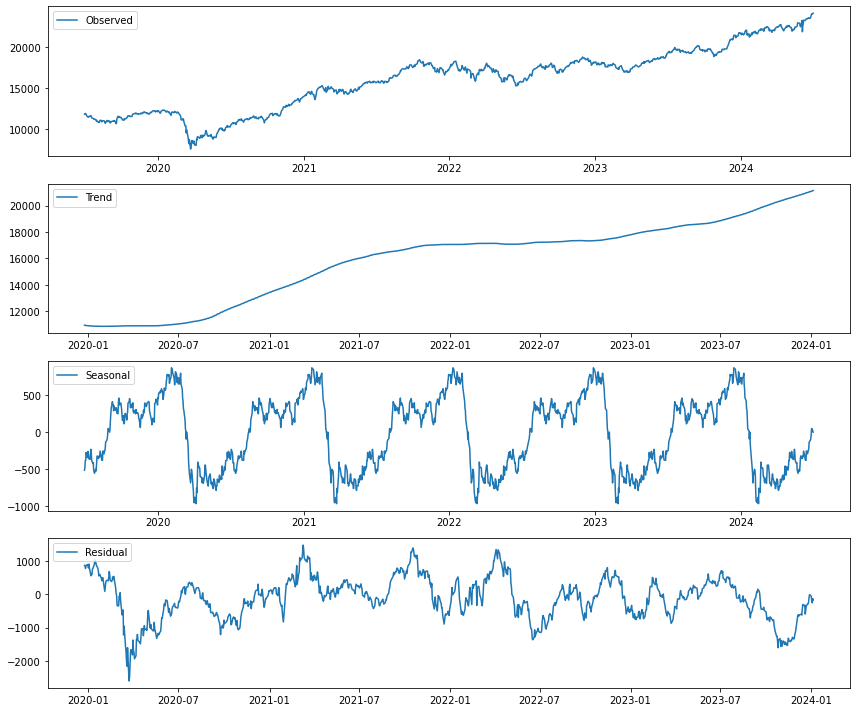

In [24]:
close_df = df['Close']
decomposition = seasonal_decompose(close_df, model='additive', period=252)  # Assuming an annual seasonality with 252 business days

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# SARIMA Model

In [25]:
from pmdarima import auto_arima

In [26]:
close_df = df['Close']

In [27]:
sarima_model = auto_arima(close_df, seasonal=True, m=5, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=16967.680, Time=3.41 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=16976.810, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=16972.095, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=16971.950, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=16979.235, Time=0.13 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=16965.904, Time=1.81 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=16970.814, Time=1.43 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=16967.452, Time=2.40 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=16966.276, Time=1.63 sec
 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=16974.706, Time=3.67 sec
 ARIMA(1,1,2)(0,0,1)[5] intercept   : AIC=16975.875, Time=0.35 sec
 ARIMA(2,1,1)(0,0,1)[5] intercept   : AIC=16975.862, Time=0.66 sec
 ARIMA(3,1,2)(0,0,1)[5] intercept   : AIC=inf, Time=3.87 sec
 ARIMA(2,1,3)(0,0,1)[5] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(1,1,1)(0,0,1)[5] interce

In [28]:
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1306
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 5)   Log Likelihood               -8475.952
Date:                             Fri, 26 Jul 2024   AIC                          16965.904
Time:                                     12:23:58   BIC                          17002.122
Sample:                                 07-01-2019   HQIC                         16979.490
                                      - 07-01-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.7340      5.520      1.763      0.078      -1.086      20.554
ar.L1          0.8482      

In [49]:
sarima_model = SARIMAX(close_df, order=(1, 1, 0), seasonal_order=(0, 0, 1, 5))
sarima_fit = sarima_model.fit(disp=False)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


# Forecast

In [50]:
forecast_steps =7 
forecast = sarima_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast

In [51]:
last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i+1) for i in range(forecast_steps)]

# Print and plot forecasts

In [52]:
forecast_steps = 7
start_date = df.index[-1] + pd.Timedelta(days=1)
prediction_dates = []

while len(prediction_dates) < forecast_steps:
    if start_date.weekday() < 5:  
        prediction_dates.append(start_date)
    start_date += pd.Timedelta(days=1)
    
    


In [53]:
forecast = sarima_fit.forecast(steps=forecast_steps)

In [54]:
prediction_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Close': forecast})
prediction_df.set_index('Date', inplace=True)


In [55]:
print(prediction_df)

            Predicted_Close
Date                       
2024-07-02     24150.241216
2024-07-03     24161.604199
2024-07-04     24174.381319
2024-07-05     24172.241665
2024-07-08     24181.790706
2024-07-09     24181.429979
2024-07-10     24181.443606


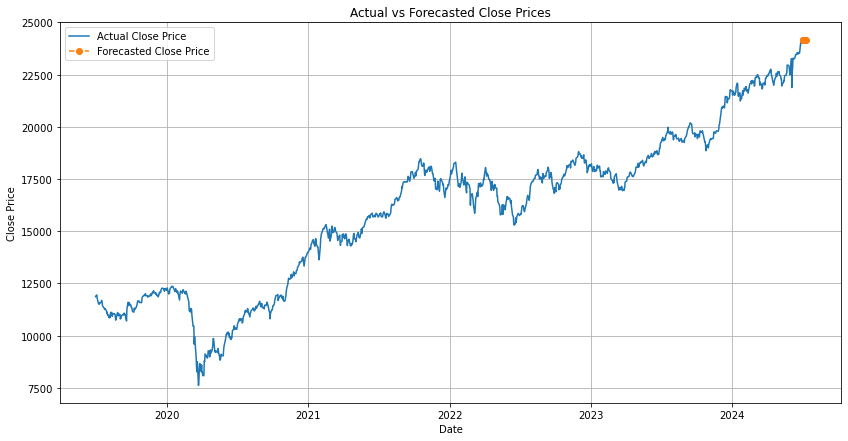

In [56]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(prediction_dates, forecast, label='Forecasted Close Price', linestyle='--', marker='o')
plt.title('Actual vs Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Evaluate Forecast Accuracy
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [38]:
# Refit the model on training data
sarima_model = SARIMAX(train['Close'], order=(1, 1, 0), seasonal_order=(1, 0, 0,5))
sarima_fit = sarima_model.fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [39]:
# Forecast on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima_fit.predict(start=start, end=end, typ='levels')

In [40]:
# Evaluate accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['Close'], predictions)
mse = mean_squared_error(test['Close'], predictions)
rmse = mse ** 0.5
mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100

accuracy_results = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute  percentage Error':mape
}

print(accuracy_results)

{'Mean Absolute Error': 2092.0049945945448, 'Mean Squared Error': 6349877.7761817565, 'Root Mean Squared Error': 2519.8963820327526, 'Mean Absolute  percentage Error': 9.520019587929356}
